<a href="https://colab.research.google.com/github/lwatso/CIND820/blob/main/L_Watson_Initial_Results_and_the_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [429]:
import pandas as pd                  #Importing Pandas library
import numpy as np                   #Importing numpy library
import seaborn as sns
import matplotlib.pyplot as plt      # Import matplotlib library
import os

In [430]:
import pandas as pd
data = pd.read_excel('Absenteeism_at_work.xlsx')

In [431]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**1. Summarize & Visualize the Dataset**
---
---

In [432]:
data.describe()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Workload,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
count,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,...,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000
mean,18.017568,19.216216,6.324324,3.914865,2.544595,221.329730,29.631081,12.554054,36.450000,271490.235135,...,0.054054,1.291892,1.018919,0.567568,0.072973,0.745946,79.035135,172.114865,26.677027,6.924324
std,11.021247,8.433406,3.436287,1.421675,1.111831,66.952223,14.836788,4.384873,6.478772,39058.116188,...,0.226277,0.673238,1.098489,0.495749,0.260268,1.318258,12.883211,6.034995,4.285452,13.330998
min,1.000000,0.000000,0.000000,2.000000,1.000000,118.000000,5.000000,1.000000,27.000000,205917.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000
25%,9.000000,13.000000,3.000000,3.000000,2.000000,179.000000,16.000000,9.000000,31.000000,244387.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,169.000000,24.000000,2.000000
50%,18.000000,23.000000,6.000000,4.000000,3.000000,225.000000,26.000000,13.000000,37.000000,264249.000000,...,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,83.000000,170.000000,25.000000,3.000000
75%,28.000000,26.000000,9.000000,5.000000,4.000000,260.000000,50.000000,16.000000,40.000000,294217.000000,...,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,89.000000,172.000000,31.000000,8.000000
max,36.000000,28.000000,12.000000,6.000000,4.000000,388.000000,52.000000,29.000000,58.000000,378884.000000,...,1.000000,4.000000,4.000000,1.000000,1.000000,8.000000,108.000000,196.000000,38.000000,120.000000


**2. Dataset Preparation**
---
---

In [433]:
#Dropping the ID column since it is not a predictor, only used to label the individuals data was collected from

data_cl = data.drop('ID', axis = 1)

In [434]:
#Manual Feature selection, removing Weight, Height, BMI columns from data to focus on Cost of Living factors that increase absenteeism. 

data_cl = data_cl.drop('Weight', axis = 1)

In [435]:
data_cl = data_cl.drop('Height', axis = 1)

In [436]:
data_cl = data_cl.drop('Body mass index', axis = 1)

In [437]:
#Rename the columns to be able to query

data_cl2 = data_cl.rename(columns={'Reason for absence' : 'Reason_for_absence', 'Month of absence' : 'Month_of_absence', 'Day of the week' : 'Day_of_the_week' , 'Transportation expense' : 'Transportation_expense' , 'Distance from Residence to Work' : 'Distance_to_work' , 'Service time' : 'Service_time' , 'Hit target' : 'Hit_target' , 'Disciplinary failure' : 'Disciplinary_failure' , 'Social drinker' : 'Social_drinker' , 'Social smoker' : 'Social_smoker' , 'Son' : 'Child' , 'Absenteeism time in hours' : 'Absenteeism_time'})

In [438]:
data_cl2.describe()

,Reason_for_absence,Month_of_absence,Day_of_the_week,Seasons,Transportation_expense,Distance_to_work,Service_time,Age,Workload,Hit_target,Disciplinary_failure,Education,Child,Social_drinker,Social_smoker,Pet,Absenteeism_time
count,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000
mean,19.216216,6.324324,3.914865,2.544595,221.329730,29.631081,12.554054,36.450000,271490.235135,94.587838,0.054054,1.291892,1.018919,0.567568,0.072973,0.745946,6.924324
std,8.433406,3.436287,1.421675,1.111831,66.952223,14.836788,4.384873,6.478772,39058.116188,3.779313,0.226277,0.673238,1.098489,0.495749,0.260268,1.318258,13.330998
min,0.000000,0.000000,2.000000,1.000000,118.000000,5.000000,1.000000,27.000000,205917.000000,81.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.000000,3.000000,3.000000,2.000000,179.000000,16.000000,9.000000,31.000000,244387.000000,93.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,23.000000,6.000000,4.000000,3.000000,225.000000,26.000000,13.000000,37.000000,264249.000000,95.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,3.000000
75%,26.000000,9.000000,5.000000,4.000000,260.000000,50.000000,16.000000,40.000000,294217.000000,97.000000,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,8.000000
max,28.000000,12.000000,6.000000,4.000000,388.000000,52.000000,29.000000,58.000000,378884.000000,100.000000,1.000000,4.000000,4.000000,1.000000,1.000000,8.000000,120.000000


In [439]:
#Drop data where Absenteeism time in hours is 0 as it will not show indicators of asbenteeism  

data_cl2.drop(data_cl2[data_cl2['Absenteeism_time'] < 1].index, inplace = True)

In [440]:
#Rename dataframe

clean_data = data_cl2

In [441]:
#Inspect cleaned database attributes

clean_data.shape

(696, 17)

In [442]:
#Feature review & selection via correlation
clean_data.corr()

,Reason_for_absence,Month_of_absence,Day_of_the_week,Seasons,Transportation_expense,Distance_to_work,Service_time,Age,Workload,Hit_target,Disciplinary_failure,Education,Child,Social_drinker,Social_smoker,Pet,Absenteeism_time
Reason_for_absence,1.000000,-0.051632,0.139780,-0.049309,-0.082326,0.166834,0.063563,-0.012952,-0.135910,0.011565,NaN,-0.102716,-0.015184,0.121221,-0.071135,-0.029914,-0.300813
Month_of_absence,-0.051632,1.000000,-0.004435,0.396522,0.130296,-0.005061,-0.060860,0.003033,-0.173712,-0.458745,NaN,-0.059851,0.071349,0.042514,-0.049586,0.074547,0.033875
Day_of_the_week,0.139780,-0.004435,1.000000,0.049012,0.035570,0.118194,0.006891,-0.012138,0.018928,0.035371,NaN,0.059631,0.103492,0.038277,0.026839,-0.014858,-0.130839
Seasons,-0.049309,0.396522,0.049012,1.000000,0.018140,-0.055463,-0.006818,-0.026869,0.164882,-0.047721,NaN,0.005660,0.039101,-0.050597,-0.080228,0.021174,0.012429
Transportation_expense,-0.082326,0.130296,0.035570,0.018140,1.000000,0.265104,-0.341838,-0.217854,-0.024080,-0.076930,NaN,-0.058251,0.386831,0.174328,0.007725,0.431546,0.040808
Distance_to_work,0.166834,-0.005061,0.118194,-0.055463,0.265104,1.000000,0.143673,-0.134035,-0.066845,-0.015486,NaN,-0.265459,0.039428,0.485190,-0.089702,0.207687,-0.099886
Service_time,0.063563,-0.060860,0.006891,-0.006818,-0.341838,0.143673,1.000000,0.677288,0.018731,-0.012775,NaN,-0.210558,-0.053415,0.346365,0.091961,-0.469122,0.019654
Age,-0.012952,0.003033,-0.012138,-0.026869,-0.217854,-0.134035,0.677288,1.000000,-0.042212,-0.029013,NaN,-0.215207,0.061813,0.214618,0.128160,-0.264427,0.086038
Workload,-0.135910,-0.173712,0.018928,0.164882,-0.024080,-0.066845,0.018731,-0.042212,1.000000,-0.075656,NaN,-0.078196,0.038374,-0.016247,-0.001562,-0.003880,0.030206
Hit_target,0.011565,-0.458745,0.035371,-0.047721,-0.076930,-0.015486,-0.012775,-0.029013,-0.075656,1.000000,NaN,0.088417,-0.008960,-0.082788,0.048892,-0.006434,0.009171


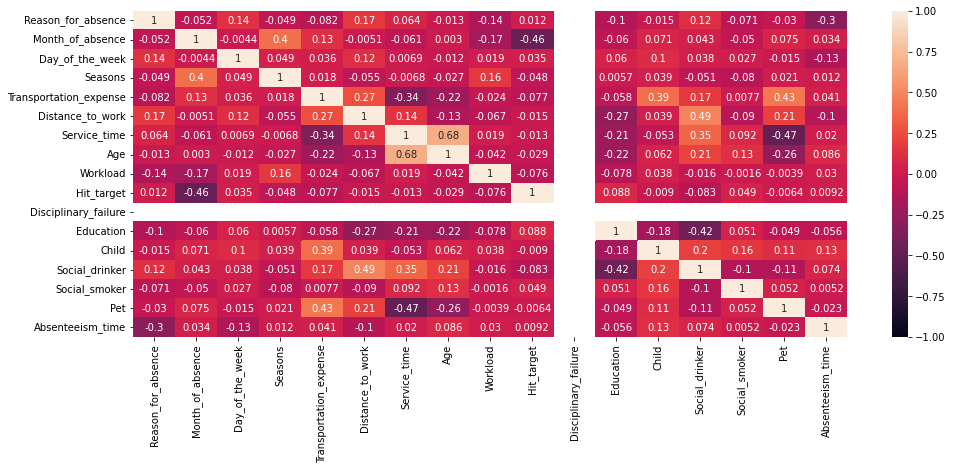

In [443]:
#Feature selection & review via heatmap 

plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(clean_data.corr(), vmin=-1, vmax=1, annot=True)

#Age & service time appear to have a high correlation of 0.68
#In my research report, one question uses age another uses service time. I will be able to deduce an answer to both of these questions using 1 variable as I now realize they predict similar things
#I will keep service time and remove age

#Month & Season have strong correlation of 0.4;
#I will keep Season and remove Month as Season is essentially a grouping of Months

#Distance to work and social drinker have a strong correlation of 0.49; I assume this is because if one lives close to work a smaller commute time would attribute to more time for activities after work vs. commuting
#I will keep both variables 

In [444]:
#Removing features based on correlation heat map results; remove age, months

clean_data1 = clean_data.drop('Month_of_absence', axis = 1)

In [445]:
clean_data2 = clean_data1.drop('Age', axis = 1)

In [446]:
#Inspecting final shape 

clean_data2.shape

(696, 15)

In [447]:
#I still feel as though the dataset is too large for what my research is focused on. 
#I will tailor the dataset to meet my research question focus, which is on Travel expense, distance to work, tenure, and family obligations 
#Remove: Reason for Absence, Day of Week, Workload, Hit Target, Disciplinary Failure, Education, Social Drinker, Social Smoker


clean_data3 = clean_data2.drop(['Reason_for_absence' , 'Day_of_the_week' , 'Workload' , 'Hit_target' , 'Disciplinary_failure' , 'Education' , 'Social_drinker' , 'Social_smoker'], axis = 1)

In [448]:
#Inspecting final shape

clean_data3.shape

(696, 7)

In [449]:
clean_data3.describe()

,Seasons,Transportation_expense,Distance_to_work,Service_time,Child,Pet,Absenteeism_time
count,696.000000,696.000000,696.000000,696.000000,696.000000,696.000000,696.000000
mean,2.507184,219.916667,29.853448,12.553161,1.000000,0.728448,7.362069
std,1.105880,65.803295,14.855615,4.440175,1.098069,1.281679,13.628618
min,1.000000,118.000000,5.000000,1.000000,0.000000,0.000000,1.000000
25%,2.000000,179.000000,16.000000,9.000000,0.000000,0.000000,2.000000
50%,2.000000,225.000000,26.000000,13.000000,1.000000,0.000000,3.000000
75%,3.250000,260.000000,50.000000,16.000000,2.000000,1.000000,8.000000
max,4.000000,388.000000,52.000000,29.000000,4.000000,8.000000,120.000000


**3a. Models Evaluation - Decision Tree**
---
---



In [450]:
#Dataframe for Decision Tree

dt_data = clean_data3

In [451]:
#Importing required packages

import pandas
from sklearn import tree
import matplotlib.pyplot as plt

In [452]:
#Target Column is Absenteeism in Time; I must pick features to use in the decision tree

features = ['Seasons', 'Transportation_expense' , 'Distance_to_work' , 'Service_time' , 'Child' , 'Pet']

X = dt_data[features] #Features 
y = dt_data.Absenteeism_time #Target

In [453]:
#Splitting the Data 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [454]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

In [455]:
clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [456]:
#checking test set

X_test

,Seasons,Transportation_expense,Distance_to_work,Service_time,Child,Pet
651,3,179,26,9,0,0
447,3,291,31,12,1,1
115,2,118,10,10,0,0
720,1,118,10,10,0,0
640,2,228,14,16,2,1
...,...,...,...,...,...,...
470,1,246,25,16,0,0
679,3,179,26,9,0,0
611,2,225,26,9,1,2
110,4,118,10,10,0,0


In [457]:
predictions = clf.predict(X_test)
predictions

array([  2,   2,   2,   4,   3,   2,   2,  32,   8,   2,   3,   2,   3,
         8,   8,   1,   2,   8,   3,   8,   2,   1,   8,   3,   1,   8,
         1,   3,   8,   4,   4,   1,   2,   8,   1,   8,   2,   2,   1,
         8,   4,   8,   3,   2,   3,   8,   8,   8,   8,   1,   3,   1,
         3,   3,   1,   3,   1,   4,   2,   3,   3,   2,   8,   1,   3,
         2,   3,   2,   2,   1,   3,   2,   8,   2,   3,   3,   8,   2,
         3,   1,   1,   3,   1,   1,   2,   8,   1,  32,   3,   4,   3,
         8,   2,   4,   3,   8,   2,   3,   1,   1,   1,   2,   3,   3,
         8,   2,   8,   1,   8,   8,   1,   8,   3,   2,   8,   2,   2,
        32,   1,   2,   3,   3,   1,   2,   4,   1,   1,   2,   2,   8,
         4,   2,   4,   2,   2,   2,  32,   8,   2,   3,   2,  16,   4,
         8,   8,   2,   2,   1,   2,   4,   3,   4,   1,   8,   3,   8,
         2,   3,   4,   2,   3,   4,   2,   2,   2,   2,   2,   2,   4,
         2,   3,   1,   3,   2,   2,   1,   2,   3,   3,   4,   

In [458]:
#Reviewing accuracy of the decision tree. The decision tree is not accurate at only 32%, demonstrating that either too many factors were removed or that the factors I thought would impact absenteeism do not 

from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.32057416267942584

**3b. Models Evaluation - Naive Bayes**
---
---

In [459]:
#Required Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [460]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X, y)

GaussianNB()

In [461]:
#Predicting the Test set results
y_pred = classifier.predict(X_test)

In [462]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.17      0.04      0.07        23
           2       0.35      0.37      0.36        59
           3       0.20      0.08      0.11        39
           4       0.00      0.00      0.00        14
           7       0.00      0.00      0.00         0
           8       0.29      0.26      0.28        61
          16       0.00      0.00      0.00         4
          24       0.00      0.00      0.00         1
          32       0.00      0.00      0.00         2
          40       0.00      0.00      0.00         1
          48       0.00      0.00      0.00         0
          56       0.06      1.00      0.11         1
          64       0.00      0.00      0.00         1
          80       0.06      1.00      0.11         2
         112       0.00      0.00      0.00         0
         120       0.00      0.00      0.00         1

    accuracy                           0.22       209
   macro avg       0.07   

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1

In [463]:
from sklearn import metrics
def conftable(test,pred, imagename):
    confmatrix= metrics.confusion_matrix(y_test, y_pred)
    plt.matshow(confmatrix)
    plt.title('Confusion matrix')
    plt.colorbar()
    plt.ylabel('GroundTruth')
    plt.xlabel('Predicted')
    plt.savefig(imagename)
    
    plt.show()
    print(confmatrix)

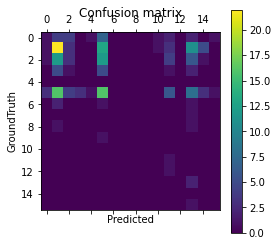

[[ 1  4  4  0  1  7  0  0  0  0  1  2  0  2  0  1]
 [ 1 22  3  0  0 13  0  0  0  0  1  3  0 11  5  0]
 [ 1 12  3  0  0 12  0  0  0  0  0  4  0  6  1  0]
 [ 0  5  1  0  0  5  0  0  0  0  0  1  0  2  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 3 16  4  3  1 16  0  0  0  0  0  6  0  8  3  1]
 [ 0  2  0  0  0  1  0  0  0  0  0  0  0  1  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0]
 [ 0  1  0  0  0  0  0  0  0  0  0  0  0  1  0  0]
 [ 0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  2  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0]]


In [464]:
conftable(y_test,y_pred,"conf")

In [465]:
#Accuracy is lower with Naive Bayes than Decision Tree

print("Accuracy: ", metrics.accuracy_score(y_test,y_pred))

Accuracy:  0.215311004784689


**3c. Model Evaluation - Logistic Regression**
---
---

In [468]:
from sklearn.linear_model import LogisticRegression

In [469]:
logmodel = LogisticRegression(random_state = 0)

In [470]:
logmodel.fit(X,y)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(random_state=0)

In [471]:
predictions = logmodel.predict(X_test)

In [473]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,predictions))


              precision    recall  f1-score   support

           1       0.00      0.00      0.00        23
           2       0.19      0.10      0.13        59
           3       0.36      0.23      0.28        39
           4       0.00      0.00      0.00        14
           8       0.33      0.82      0.47        61
          16       0.00      0.00      0.00         4
          24       0.00      0.00      0.00         1
          32       0.00      0.00      0.00         2
          40       0.00      0.00      0.00         1
          56       0.00      0.00      0.00         1
          64       0.00      0.00      0.00         1
          80       0.00      0.00      0.00         2
         120       0.00      0.00      0.00         1

    accuracy                           0.31       209
   macro avg       0.07      0.09      0.07       209
weighted avg       0.22      0.31      0.23       209



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [474]:
from sklearn import metrics
def conftable(test,pred, imagename):
    confmatrix= metrics.confusion_matrix(y_test,predictions)
    plt.matshow(confmatrix)
    plt.title('Confusion matrix')
    plt.colorbar()
    plt.ylabel('GroundTruth')
    plt.xlabel('Predicted')
    plt.savefig(imagename)
    
    plt.show()
    print(confmatrix)

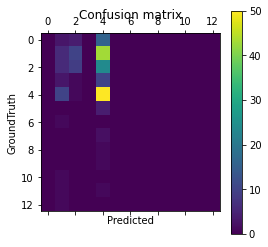

[[ 0  3  4  0 16  0  0  0  0  0  0  0  0]
 [ 0  6 10  0 43  0  0  0  0  0  0  0  0]
 [ 0  6  9  0 24  0  0  0  0  0  0  0  0]
 [ 0  3  1  0 10  0  0  0  0  0  0  0  0]
 [ 0 10  1  0 50  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  4  0  0  0  0  0  0  0  0]
 [ 0  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  2  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  1  0  0  0  0  0  0  0  0  0  0  0]]


In [476]:
conftable(y_test,predictions,"conf")

In [477]:
print("Accuracy: ", metrics.accuracy_score(y_test,predictions))

Accuracy:  0.31100478468899523
